# Semantic Segmentation Example

In [8]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from skimage import io, transform, exposure, img_as_uint, img_as_float
import imageio as io
from fastai import *
from fastai.data.all import *
from fastai.vision.all import *

## Prepare Image Data and Masks

In [9]:
path = "C:/Users/amaxwel6/Desktop/landcover/"
testSet = pd.read_csv(path + "test.txt", header=None)
testSet.columns = ["id"]
testSet["img_path"] = path + "output/img/" + testSet["id"] + ".png"
testSet["set"] = "test"

trainSet = pd.read_csv(path + "train.txt", header=None)
trainSet.columns = ["id"]
trainSet["img_path"] = path + "output/img/" + trainSet["id"] + ".png"
trainSet["set"] = "train"

path = "C:/Users/amaxwel6/Desktop/landcover/"
valSet = pd.read_csv(path + "val.txt", header=None)
valSet.columns = ["id"]
valSet["img_path"] = path + "output/img/" + valSet["id"] + ".png"
valSet["set"] = "val"

len(testSet), len(trainSet), len(valSet)

(1602, 7470, 1602)

In [10]:
df = pd.concat([trainSet, valSet, testSet])
df

,id,img_path,set
0,M-33-20-D-c-4-2_0,C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_0.png,train
1,M-33-20-D-c-4-2_1,C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_1.png,train
2,M-33-20-D-c-4-2_10,C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_10.png,train
3,M-33-20-D-c-4-2_100,C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_100.png,train
4,M-33-20-D-c-4-2_102,C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_102.png,train
...,...,...,...
1597,N-34-97-D-c-2-4_63,C:/Users/amaxwel6/Desktop/landcover/output/img/N-34-97-D-c-2-4_63.png,test
1598,N-34-97-D-c-2-4_66,C:/Users/amaxwel6/Desktop/landcover/output/img/N-34-97-D-c-2-4_66.png,test
1599,N-34-97-D-c-2-4_74,C:/Users/amaxwel6/Desktop/landcover/output/img/N-34-97-D-c-2-4_74.png,test
1600,N-34-97-D-c-2-4_76,C:/Users/amaxwel6/Desktop/landcover/output/img/N-34-97-D-c-2-4_76.png,test


## Set Up Batch Generator

In [11]:
codes = np.asarray(["background", "buildings", "woodlands", "water"])
print(codes)

['background' 'buildings' 'woodlands' 'water']


In [12]:
path = Path("C:/Users/amaxwel6/Desktop/landcover/output/")
fnames = get_image_files(path, folders="img")
not_test = df[df['set'] != "test"].index.tolist()
fnames2 = fnames[not_test]
is_val = df[df['set'] == "val"].index.tolist()
fnames2, len(is_val)

((#9072) [Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_0.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_1.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_10.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_100.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_101.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_102.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_103.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_104.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_105.png'),Path('C:/Users/amaxwel6/Desktop/landcover/output/img/M-33-20-D-c-4-2_106.png')...],
 1602)

In [13]:
def label_func(fn): return path/"mask"/f"{fn.stem}_m{fn.suffix}"
label_func(fnames[0])

Path('C:/Users/amaxwel6/Desktop/landcover/output/mask/M-33-20-D-c-4-2_0_m.png')

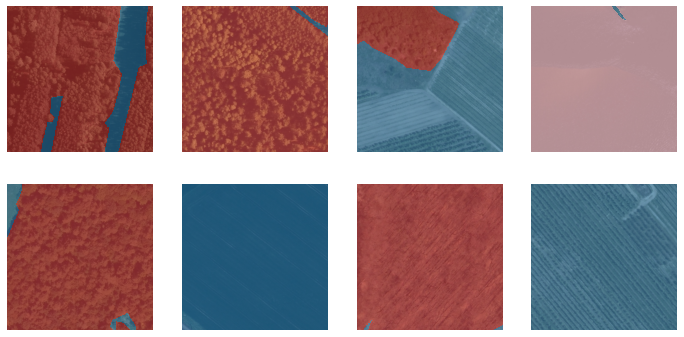

In [14]:
dblock = DataBlock(blocks=(ImageBlock, MaskBlock(codes=codes)),
                           splitter= IndexSplitter(valid_idx=is_val),
                           get_y=label_func,
                           item_tfms=None,
                           batch_tfms=None)
dls = dblock.dataloaders(fnames2, bs=8, num_workers=0)
dls.show_batch()

In [15]:
dblock2 = dblock.datasets(fnames2)
len(dblock2.train), len(dblock2.valid)

(7470, 1602)

In [ ]:
dataloaders??

In [ ]:
learn.fine_tune(1)

## Visualize Images and Masks

## Visualize Augmentations

## Prep Model

## Train Model

## Visualize Results

## Predict to New Data

## Model Assessment